## Lab 1 (9/13) Pandas and Mathplotlib
Like other labs, this lab is due on Friday to give you time to complete if you did not finish during lab. Due 9/14

To learn/review in this lab:

1. (Tiny) Introduction to Pandas package
1. List comprehension syntax and usage
1. Very basic matplotlib commands: plot and hist
1. Dictionary types

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load a data file of the passengers on the Titanic.

In [2]:
titanic = pd.read_csv("titanic3.csv")

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


[1] Subsets of males and females. (1 point)

In [5]:
males = titanic[titanic['sex'] == 'male']

females = titanic[titanic['sex'] == 'female']

males.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


[2] Get tuples of males and females including only the passenger class, the survived flag, the age, and fare paid. Drop any rows with NaN values. (1 point) 

In [7]:
males_reduced = males.iloc[:,[0,1,4,8]]
males_reduced = males_reduced.dropna()

females_reduced = females.iloc[:,[0,1,4,8]]
females_reduced = females_reduced.dropna()

males_reduced.head()

,pclass,survived,age,fare
1,1.0,1.0,0.9167,151.5500
3,1.0,0.0,30.0000,151.5500
5,1.0,1.0,48.0000,26.5500
7,1.0,0.0,39.0000,0.0000
9,1.0,0.0,71.0000,49.5042


[3] Create a list of just the males' ages and another of just the males' fares. (1 point)

In [11]:
male_ages = [age for idx,pclass,surv,age,fare in males_reduced.itertuples()]
male_fares = [fare for idx,pclass,surv,age,fare in males_reduced.itertuples()]

males_ages[0:5]

[0.9167, 30.0, 48.0, 39.0, 71.0]

In [14]:
males_reduced.itertuples()

[4] Plot the age and fare values in a scatter plot. (1 point)

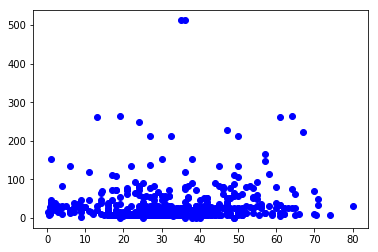

In [12]:
plt.plot(male_ages, male_fares, "ob")

[5] Write a function that returns True if its input is less than 400. (We're going to use this to filter the fare outliers.) (2 points)

In [15]:
def below400 (x):
    if x<400:
        return True
    else:
        return False
# def below400(x) : return x < 400

[6] Use your function to filter the original `males_tuples` to remove the tuples with fares above 400. Use a list comprehension. (2 points)

Note that we could also use an anonymous function (using `lambda`) to do this.

In [17]:
males_no_outliers = [(age,fare) for idx,pclass,surv,age,fare in males_reduced.itertuples()
                    if below400(fare)]


657

[7] Re-do the plot from step 5 using the filtered list. You'll have to re-create the split. (2 point)

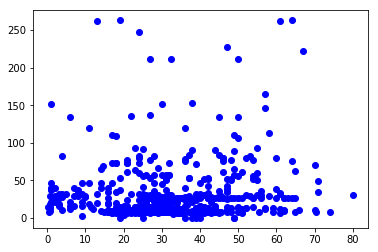

In [18]:
male_ages_no = [age for age, fare in males_no_outliers]
male_fares_no = [fare for age, fare in males_no_outliers]

plt.plot(male_ages_no, male_fares_no, "ob")

[8] Create a histogram of male ages. (Don't use the filtered list for this.) (1 point)

(array([ 35.,  24., 151., 178., 109.,  76.,  45.,  24.,  13.,   2.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <a list of 10 Patch objects>)

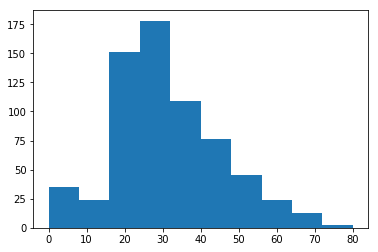

In [19]:
plt.hist(male_ages, range=[0,80])

[9] Re-create the histogram above using the female passengers, but this time enhance with labels on axes and title. (1 point)

Text(0.5,1,'Histogram of ages of female Titanic passengers')

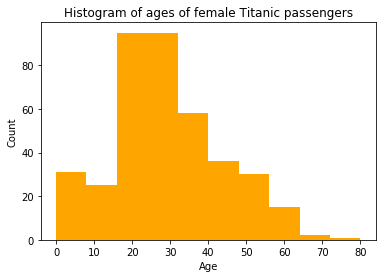

In [30]:
female_ages = [age for idx,pclass,surv,age,fare in females_reduced.itertuples()]

fig, ax = plt.subplots()

plt.hist(female_ages, range=[0,80], color = 'orange')

ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Histogram of ages of female Titanic passengers')

[10] Create a dictionary of locations with the count of passengers heading to that destination. Destination is the 15th entry. (2 points)

In [26]:
dest_dict = {}

for entry in titanic.itertuples():
    dest = entry[14]
    if dest in dest_dict:
        dest_dict[dest] = dest_dict[dest] + 1
    else:
        dest_dict[dest] = 1

[1] Using your dictionary determine how many passengers were from Chicago. (1 point)

In [27]:
dest_dict['Chicago, IL']

4

VERY IMPORTANT: Save your notebook before submitting to D2L.